In [1]:
! pip install matplotlib
import os
import glob
import sqlite3
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
%matplotlib inline

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
DB_PATH = "/data/isabelle/wzs_p1_dip/metadata/p1-dip-metadata_1130.db"

conn = sqlite3.connect(DB_PATH)
c = conn.cursor()

In [46]:
c.execute("""select * from sqlite_master 
    where
        (type = 'table')
        """)
c.fetchall()

[('table',
  'metadata',
  'metadata',
  14073,
  'CREATE TABLE metadata (\n        path text primary key,\n        filename text,\n        date text,\n        label text,\n        sn text,\n        component text,\n        degree text,\n        capacity text,\n        voltage text,\n        component_class text,\n        width integer,\n        height integer)')]

In [7]:
table = pd.read_sql_query("SELECT * from metadata where (component_class = 'label' ) and degree = 'NG' Order by date DESC", conn)
print(table.head())

                                                path  \
0  /data/aoi-wzs-p1-dip-fa-nvidia/data-center/D6/...   
1  /data/aoi-wzs-p1-dip-fa-nvidia/data-center/D6/...   
2  /data/aoi-wzs-p1-dip-fa-nvidia/data-center/D6/...   
3  /data/aoi-wzs-p1-dip-fa-nvidia/data-center/D6/...   
4  /data/aoi-wzs-p1-dip-fa-nvidia/data-center/D12...   

                                            filename      date label  \
0  55505H01000204700058J0A1_LABLELAN1_270_000_000...  20201125    NG   
1  55505H0100020470001EJ0A1_LABLELAN1_270_000_000...  20201125    NG   
2  55505H01000204700078J0A1_LABLELAN1_270_000_000...  20201124    NG   
3  55505H0100020470010FJ0A1_LABLELAN1_270_000_000...  20201124    NG   
4                J40470V0ZB1_LABELCE_000_000_000.jpg  20201123    NG   

                         sn  component degree capacity voltage  \
0  55505H01000204700058J0A1  LABLELAN1     NG      000     000   
1  55505H0100020470001EJ0A1  LABLELAN1     NG      000     000   
2  55505H01000204700078J0A1  LAB

In [53]:
c.execute("""select distinct component_class from metadata 
        """)
c.fetchall()

[('connector',),
 ('capacitor',),
 ('label',),
 ('heat_sink',),
 ('screw',),
 ('cpu_skt',),
 ('buzzer',),
 ('other',),
 ('jumper',),
 ('jumper_head',)]

In [34]:
c.execute("""select component_class, degree, label, count(*) from metadata 
    where
        (component_class = 'label' )
        group by component_class, degree, label""")
c.fetchall()

[('label', '000', 'OK', 15447),
 ('label', '090', 'OK', 1682),
 ('label', '180', 'OK', 2846),
 ('label', '270', 'OK', 1656),
 ('label', 'NG', 'NG', 1142)]

# Find incorrect degree v.s filename(degree = '000')

In [10]:
c.execute("""select component_class, degree, label, path, filename from metadata 
    where
        (component_class = 'label' )
    and
        (label = 'other')
    order by degree

""").fetchall()

[]

In [54]:
x = c.execute("""select * from metadata 
 where
        (component_class = 'heat_sink' )

   """).fetchall()
len(x)


21515

In [55]:
c.execute('select * from metadata where path=?',(x[0][0],)).fetchall()

[('/data/aoi-wzs-p1-dip-fa-nvidia/image/20190808/OK/8SSB27A18615W4ZS983006T_HSRP2_000_000_000.jpg',
  '8SSB27A18615W4ZS983006T_HSRP2_000_000_000.jpg',
  '20190808',
  'OK',
  '8SSB27A18615W4ZS983006T',
  'HSRP2',
  '000',
  '000',
  '000',
  'heat_sink',
  956,
  434)]

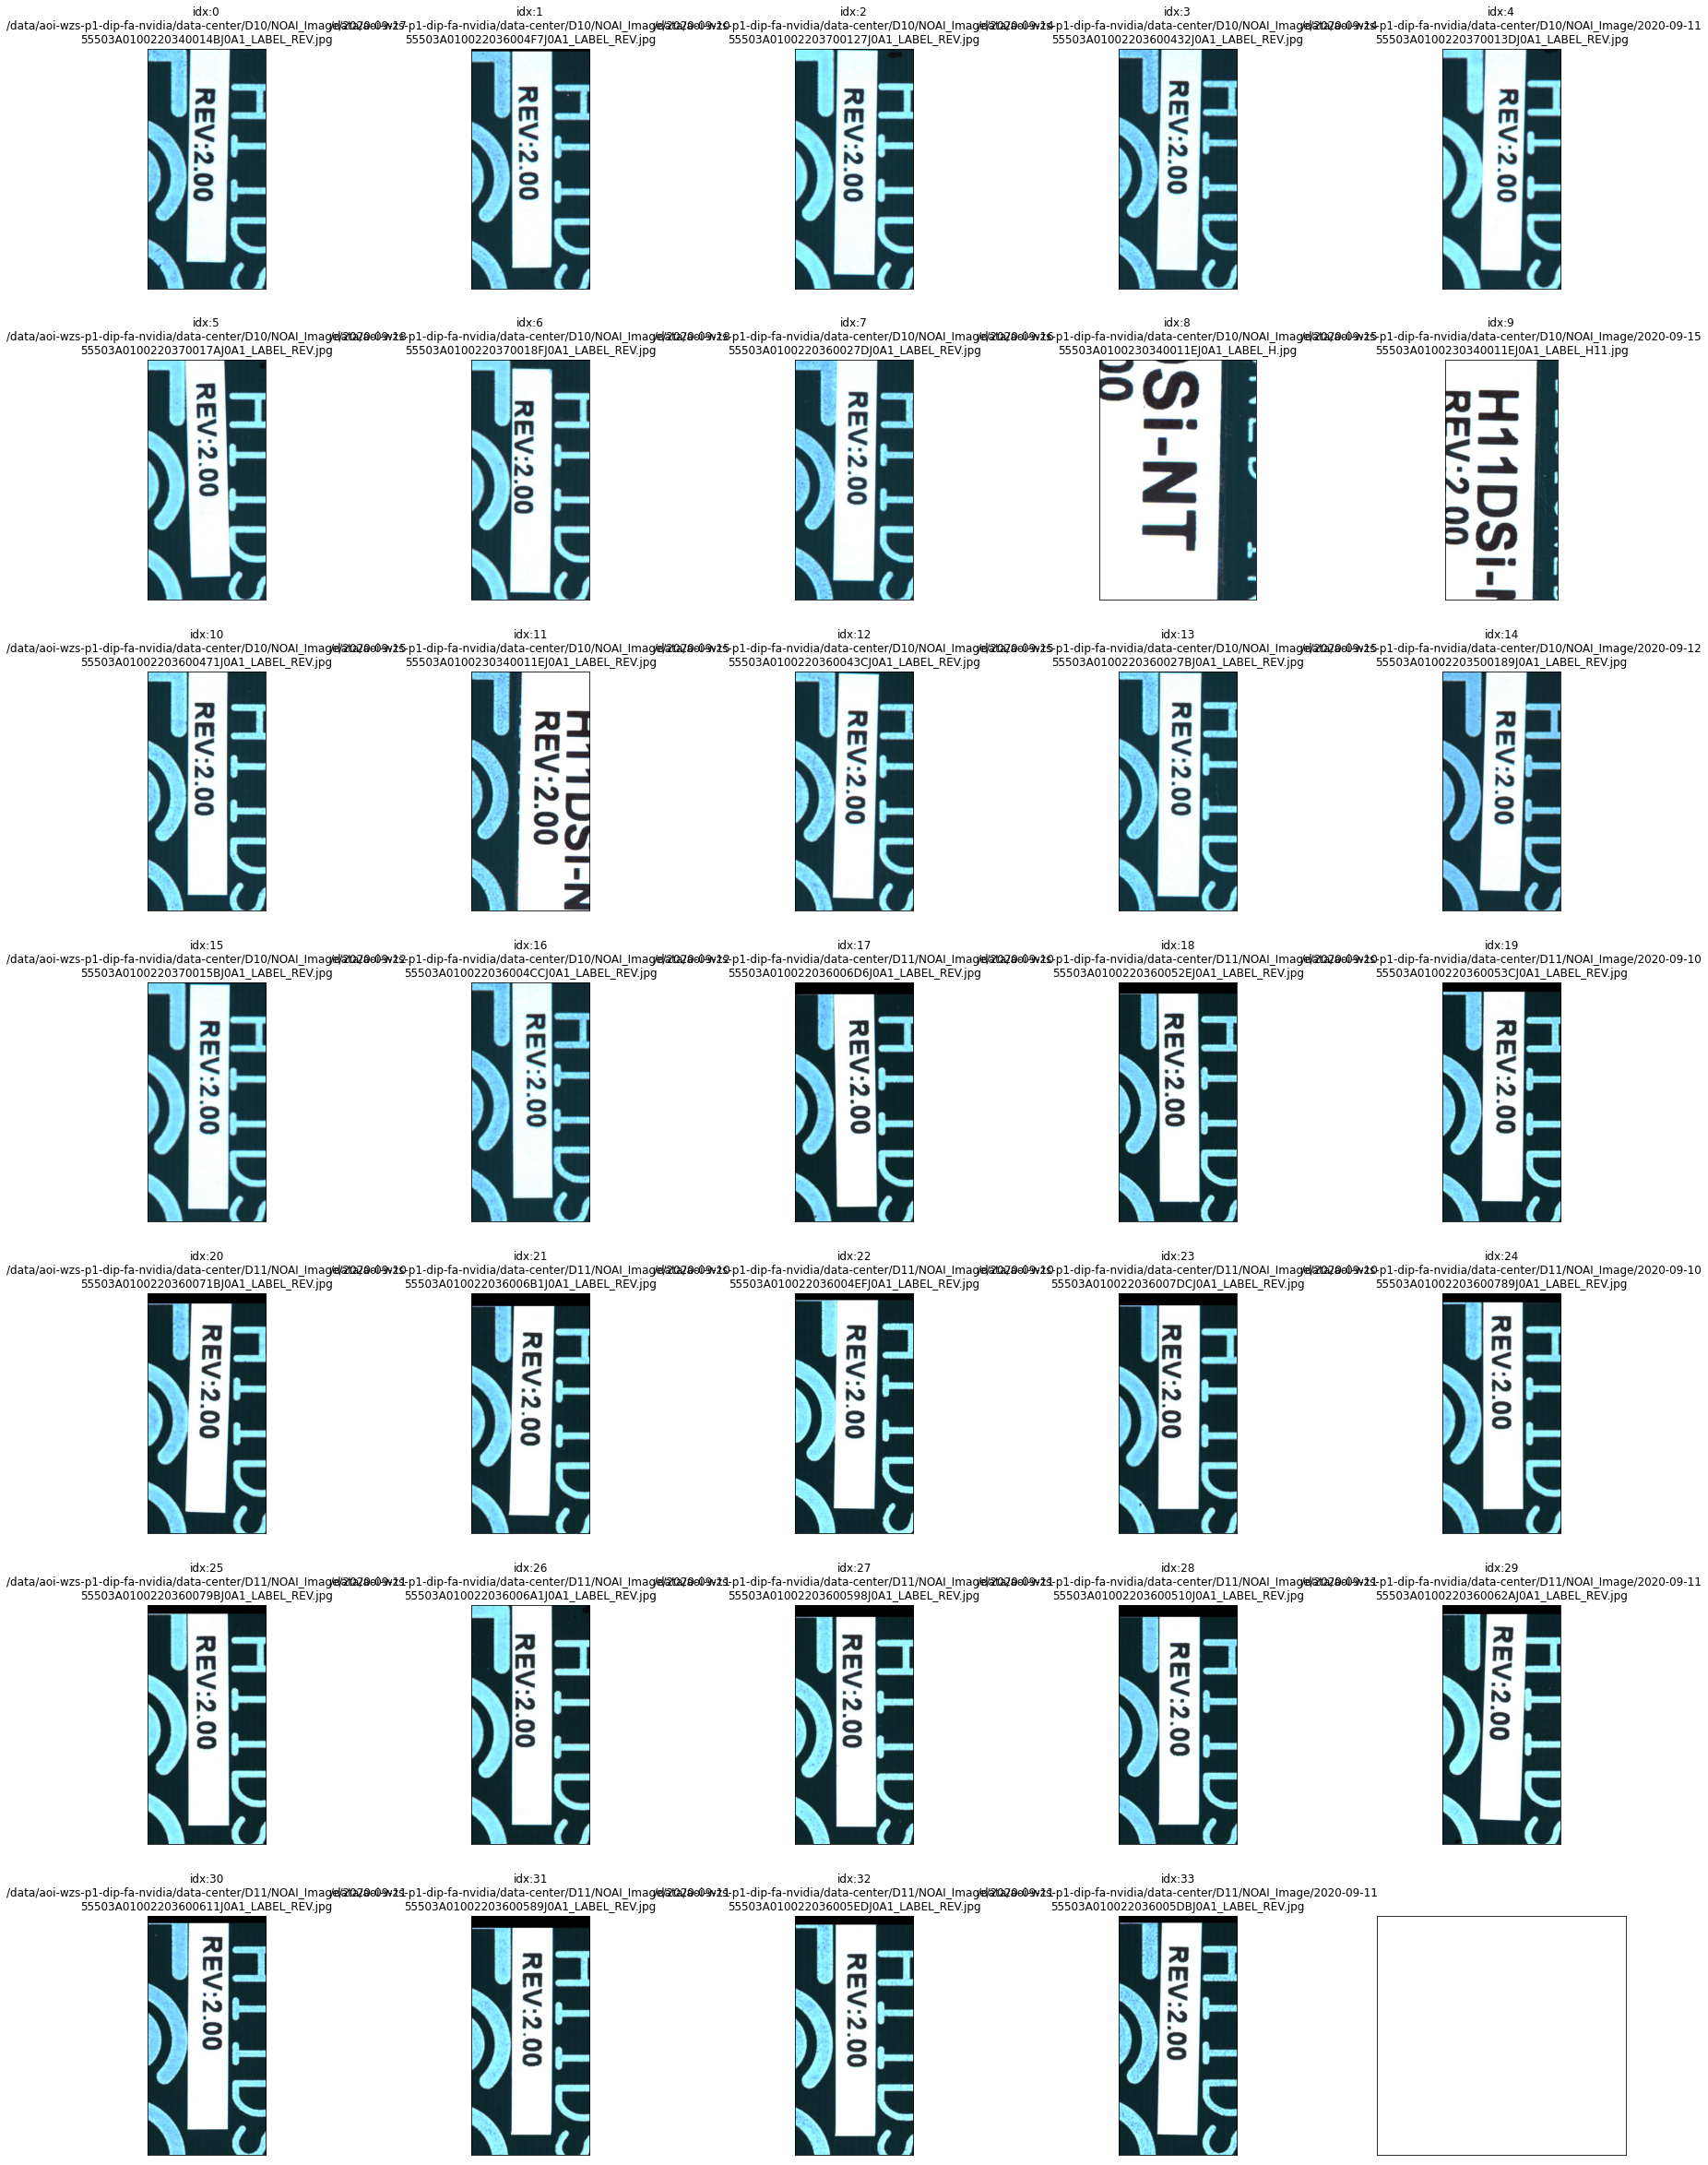

In [42]:
import os
from PIL import Image
import matplotlib.pyplot as plt
# h = 120
h = int(len(x)/5)+1
fig_h = h * 6
startofx = 0
%matplotlib inline
fig, axes = plt.subplots(h, 5, figsize=(30, fig_h), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for idx, (ax, value) in enumerate(zip(axes.flat, x[startofx:])):
    try:
        ax.imshow(Image.open(value[0]))
        ax.set_title(f'idx:{startofx+idx}\n{os.path.split(value[0])[0]}\n{os.path.split(value[0])[1]}')
    except Exception as e:
        print(e)
# plt.show()

## Find incorrect degree v.s filename

In [17]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def data_clean(filename,label, degree):
    x = c.execute("""select * from metadata 
    where (component_class = 'label' )
    and (filename like ?)
    and (label = ?)
    and (degree = ?)
    order by degree
    
    """, (filename,label, degree,)).fetchall()
    print(len(x))
    c.execute('select * from metadata where path=?',(x[0][0],)).fetchall()

    # h = 120
    h = int(len(x)/5)+1
    fig_h = h * 6
    startofx = 0
    %matplotlib inline
    fig, axes = plt.subplots(h, 5, figsize=(30, fig_h), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for idx, (ax, value) in enumerate(zip(axes.flat, x[startofx:])):
        try:
            ax.imshow(Image.open(value[0]))
            ax.set_title(f'idx:{startofx+idx}\n{os.path.split(value[0])[0]}\n{os.path.split(value[0])[1]}')
        except Exception as e:
            print(e)
    # plt.show()
    y = c.execute("""select filename from metadata 
    where (component_class = 'label' )
    and (filename like ?)
    and (label = ?)
    and (degree = ?)
    order by degree
    """, (filename,label, degree,)).fetchall()
    for i in y:
        print(i)

In [179]:
data_clean("%000_000_000.jpg",'other','000')

0


IndexError: list index out of range

In [23]:
data_clean("%Label_1.jpg",'NG', '180')

0


IndexError: list index out of range

In [239]:
data_clean('','other', "NULL")

0


IndexError: list index out of range

In [20]:
data_clean("%_000.jpg",'OK', '180')

2808


KeyboardInterrupt: 

ValueError: Image size of 2160x242784 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2160x242784 with 409 Axes>

## update metadata

In [15]:
def update_degree(filename, wrong_degree, correct_degree):
    conn = sqlite3.connect(DB_PATH)
    c = conn.cursor()
    c.execute("""UPDATE metadata SET degree = ? 
        where (component_class = 'label' )
        and (filename like ?)
        and (degree = ?)
        """, (correct_degree ,filename ,wrong_degree,))
    conn.commit()
    conn.close()

In [16]:
def update_label(filename, wrong_label, correct_label):
    conn = sqlite3.connect(DB_PATH)
    c = conn.cursor()
    c.execute("""UPDATE metadata SET label = ?
        where (component_class = 'label' )
        and (filename like ?)
        and (label = ?)
        """, (correct_label, filename, wrong_label,))
    conn.commit()
    conn.close()

In [25]:
conn = sqlite3.connect(DB_PATH)
c = conn.cursor()
c.execute("""select component_class, degree, label, count(*) from metadata 
    where
        (component_class = 'label' )
        group by component_class, degree, label""").fetchall()

[('label', '000', 'OK', 15447),
 ('label', '090', 'OK', 1682),
 ('label', '180', 'OK', 2846),
 ('label', '270', 'OK', 1656),
 ('label', 'NG', 'NG', 1142)]

In [21]:
update_label("%Label_1.jpg","NG","OK")

In [99]:
update_degree("%LABEL1_000_000_000.jpg","000","180")

## table exist None

In [227]:
#check whether None is unicode
isinstance(None, str)

False

In [241]:
def update_NULL(label, filename, correct_degree):
    conn = sqlite3.connect(DB_PATH)
    c = conn.cursor()
    c.execute("""UPDATE metadata SET degree = ? 
        where (component_class = 'label' )
        and (label = ?)
        and (filename like ?)
        and (degree is null)
        """, (correct_degree ,label, filename ,))
    conn.commit()
    conn.close()

In [267]:
update_NULL("other", "%.jpg", "270")

In [268]:
conn = sqlite3.connect(DB_PATH_1)
c = conn.cursor()
c.execute("""select component_class, degree, label, count(*) from metadata 
    where
        (component_class = 'label' )
        group by component_class, degree, label""").fetchall()

[('label', '000', 'NG', 455),
 ('label', '000', 'OK', 15355),
 ('label', '000', 'other', 3),
 ('label', '090', 'NG', 12),
 ('label', '090', 'OK', 1705),
 ('label', '180', 'NG', 651),
 ('label', '180', 'OK', 2581),
 ('label', '180', 'other', 7),
 ('label', '270', 'NG', 25),
 ('label', '270', 'OK', 1530),
 ('label', '270', 'other', 46)]

In [269]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def data_clean_NULL(filename,label):
    x = c.execute("""select * from metadata 
    where (component_class = 'label' )
    and (filename like ?)
    and (label = ?)
    and (degree is null)
    order by degree
    """, (filename,label,)).fetchall()
    print(len(x))
    c.execute('select * from metadata where path=?',(x[0][0],)).fetchall()

    # h = 120
    h = int(len(x)/5)+1
    fig_h = h * 6
    startofx = 0
    %matplotlib inline
    fig, axes = plt.subplots(h, 5, figsize=(30, fig_h), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for idx, (ax, value) in enumerate(zip(axes.flat, x[startofx:])):
        try:
            ax.imshow(Image.open(value[0]))
            ax.set_title(f'idx:{startofx+idx}\n{os.path.split(value[0])[0]}\n{os.path.split(value[0])[1]}')
        except Exception as e:
            print(e)
    # plt.show()
    y = c.execute("""select filename from metadata 
    where (component_class = 'label' )
    and (filename like ?)
    and (label = ?)
    and (degree is null)
    order by degree
    """, (filename,label,)).fetchall()
    for i in y:
        print(i)

In [270]:
data_clean_NULL("%.jpg","other")

0


IndexError: list index out of range

In [24]:
    conn = sqlite3.connect(DB_PATH)
    c = conn.cursor()
    c.execute("""UPDATE metadata SET degree = "NG" 
        where (component_class = 'label' )
        and (label = "NG")
        """)
    conn.commit()
    conn.close()